In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('compas-analysis-master/compas-scores-two-years.csv') 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize':(6,6)}) 
%matplotlib inline

In [2]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [3]:
df.shape

(7214, 53)

In [4]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

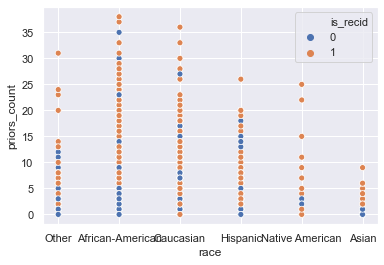

In [5]:
ax = sns.scatterplot(x="race", y="priors_count", data=df, hue = "is_recid")

In [6]:
df.tail()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0
7213,11001,florencia sanmartin,florencia,sanmartin,2014-06-30,Female,1992-12-18,23,Less than 25,Hispanic,...,4,Low,2014-06-30,2015-03-15,2015-03-15,2,0,258,0,1


In [7]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [8]:
null_list = ['c_arrest_date']
df = df.drop(null_list, axis=1)

In [9]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree',
       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
       'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [10]:
print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(7214, 52)
(0, 52)


In [11]:
print(df.isnull().sum())

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_out                 4898
violent_

In [36]:
#df.fillna(value=0, inplace=True)

In [45]:
df.count

375128

In [38]:
print(df.isnull().sum())

id                         0
name                       0
first                      0
last                       0
compas_screening_date      0
sex                        0
dob                        0
age                        0
age_cat                    0
race                       0
juv_fel_count              0
decile_score               0
juv_misd_count             0
juv_other_count            0
priors_count               0
days_b_screening_arrest    0
c_jail_in                  0
c_jail_out                 0
c_case_number              0
c_offense_date             0
c_days_from_compas         0
c_charge_degree            0
c_charge_desc              0
is_recid                   0
r_case_number              0
r_charge_degree            0
r_days_from_arrest         0
r_offense_date             0
r_charge_desc              0
r_jail_in                  0
r_jail_out                 0
violent_recid              0
is_violent_recid           0
vr_case_number             0
vr_charge_degr

In [46]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,0,0,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,0,0,2,0,1102,0,0


In [13]:
df.dtypes

id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc       

In [14]:
top_reoffenders = df.sort_values(by ='priors_count', ascending=False).head()
top_reoffenders

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
6825,10407,devin beasley,devin,beasley,2014-07-06,Male,1970-12-11,45,Greater than 45,African-American,...,8,High,2014-07-06,2014-07-05,2014-11-03,38,120,462,1,1
2058,3144,keith powell,keith,powell,2014-09-03,Male,1957-06-10,58,Greater than 45,African-American,...,2,Low,2014-09-03,2015-04-08,2015-06-24,38,0,217,1,1
2186,3340,deon warren,deon,warren,2014-04-01,Male,1977-08-06,38,25 - 45,African-American,...,2,Low,2014-04-01,2014-03-31,2014-05-01,37,30,138,1,1
328,487,timothy ryan,timothy,ryan,2014-12-11,Male,1963-04-02,53,Greater than 45,Caucasian,...,9,High,2014-12-11,2015-05-08,2015-05-09,36,26,148,0,1
4374,6669,percel kinder,percel,kinder,2013-08-22,Male,1976-07-22,39,25 - 45,African-American,...,8,High,2013-08-22,2013-10-08,2013-10-22,35,0,47,0,0


In [15]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = df[col].idxmax()
    top_df = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bottom_df = pd.DataFrame(df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('priors_count')

,2058,0
id,3144,1
name,keith powell,miguel hernandez
first,keith,miguel
last,powell,hernandez
compas_screening_date,2014-09-03,2013-08-14
sex,Male,Male
dob,1957-06-10,1947-04-18
age,58,69
age_cat,Greater than 45,Greater than 45
race,African-American,Other


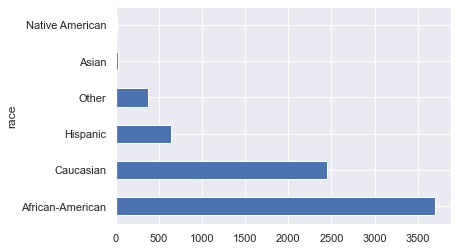

In [16]:
priors = df.groupby('race')['priors_count'].count()
priors.sort_values(ascending=False).head(10).plot.barh()

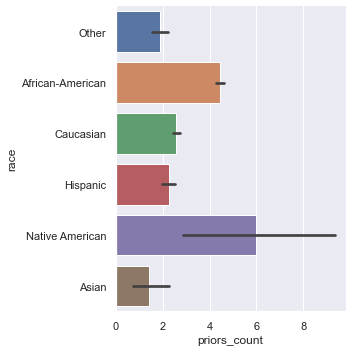

In [17]:
sns.catplot(y="race", x="priors_count", data=df, kind="bar")

In [18]:
two_years = pd.read_csv("compas-analysis-master/compas-scores-two-years.csv")

In [19]:
numerical_data = two_years.select_dtypes(np.number).fillna(0)
numerical_data.head()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
0,1,69,0,1,0,0,0,-1.0,1.0,0,0.0,0.0,0,1,1,0,0,327,0,0
1,3,34,0,3,0,0,0,-1.0,1.0,1,0.0,0.0,1,3,1,0,9,159,1,1
2,4,24,0,4,0,1,4,-1.0,1.0,1,0.0,0.0,0,4,3,4,0,63,0,1
3,5,23,0,8,1,0,1,0.0,1.0,0,0.0,0.0,0,8,6,1,0,1174,0,0
4,6,43,0,1,0,0,2,0.0,76.0,0,0.0,0.0,0,1,1,2,0,1102,0,0


In [20]:
target_variable = "priors_count"
independent_variables = numerical_data.drop(columns=target_variable).columns

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
     numerical_data[independent_variables],   # X
     numerical_data[target_variable], # y
     test_size=0.2,   # % of the data that goes to the test dataset
     random_state=13   # ensure reproductibility
)

In [22]:
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (5771, 19)
y train (5771,)
X test (1443, 19)
y test (1443,)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# get intercept
print(model.intercept_)

# get slope
model.coef_?

2.1227464230832993e-13


In [25]:
predictions = model.predict(X_test) 

In [26]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["priors_count"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,days_b_screening_arrest,c_days_from_compas,is_recid,...,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid,priors_count,prediction
0,5444,8291,59,0,1,0,0,-66.0,67.0,0,...,0,1,1,4,0,1046,0,0,4,4.000000e+00
1,2558,3904,59,0,2,0,0,-1.0,1.0,0,...,0,2,1,0,0,1152,0,0,0,-1.452909e-13
2,3800,5804,24,0,8,0,4,-1.0,1.0,1,...,0,8,8,8,214,279,1,1,8,8.000000e+00
3,4087,6227,23,0,7,0,0,0.0,1.0,1,...,0,7,7,2,0,299,1,1,2,2.000000e+00
4,6656,10151,47,0,1,0,0,-61.0,61.0,0,...,0,1,1,1,0,1012,0,0,1,1.000000e+00


Text(0, 0.5, 'Priors Count')

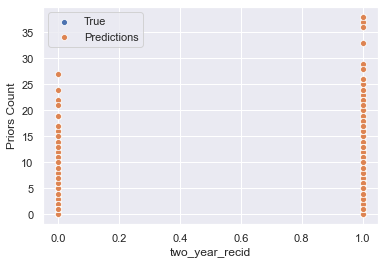

In [27]:
sns.scatterplot(x=X["two_year_recid"], y=X["priors_count"], label = 'True')
sns.scatterplot(x=X["two_year_recid"], y=X["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("Priors Count")

Text(0, 0.5, 'Priors Count')

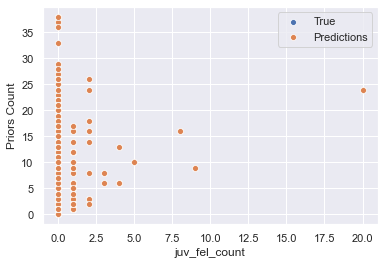

In [28]:
sns.scatterplot(x=X["juv_fel_count"], y=X["priors_count"], label = 'True')
sns.scatterplot(x=X["juv_fel_count"], y=X["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("Priors Count")

In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
survey = pd.read_csv('compas-analysis-master/compas-scores-two-years.csv') 

In [30]:
survey.to_csv("data/survey.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/survey.csv'

In [ ]:
survey.race.describe()

In [ ]:
survey.age.describe()

In [ ]:
survey.priors_count.describe()

In [ ]:
survey.race.mode()

In [ ]:
survey.sex.mode()

In [ ]:
survey.groupby('race')["priors_count"].mean()

In [ ]:
survey[['juv_fel_count', 'priors_count']].corr()